##  Chapter 2

### 感知机

In [24]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [4]:
#load data
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df["label"] = iris.target

df.columns = ['sepal length','sepal width','petal length','petal width','label']
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

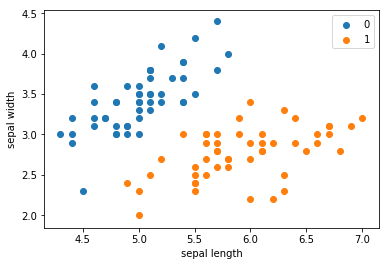

In [6]:
plt.scatter(df[:50]['sepal length'],df[:50]['sepal width'],label='0')
plt.scatter(df[50:100]['sepal length'],df[50:100]['sepal width'],label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [8]:
data = np.array(df.iloc[:100,[0,1,-1]])

In [242]:
data[:5]

array([[5.1, 3.5, 0. ],
       [4.9, 3. , 0. ],
       [4.7, 3.2, 0. ],
       [4.6, 3.1, 0. ],
       [5. , 3.6, 0. ]])

In [14]:
X,Y = data[:,:-1],data[:,-1]
Y = np.array([1 if i==1 else -1 for i in Y])

## Model

In [31]:
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0])-1,dtype=np.float32)
        self.b = 0
        self.learning_rate = 0.1
    def sign(self,x,w,b):
        y = np.dot(x,w)+b
        return y
    def fit(self,X_train,Y_train):
        flag = False
        while not flag:
            count = 0
            for i in tqdm(range(len(X_train))):
                X = X_train[i]
                Y = Y_train[i]
                if Y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.learning_rate * np.dot(Y,X)
                    self.b = self.b + self.learning_rate * Y
                    count += 1
            if count == 0:
                flag = True
        

In [32]:
model = Model()
model.fit(X,Y)

100%|████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 100150.53it/s]


100%|████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 101828.21it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 50159.10it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 33410.10it/s]


100%|████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 100102.72it/s]


100%|████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 100510.52it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 50135.12it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 50177.10it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 50105.17it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 49884.68it/s]


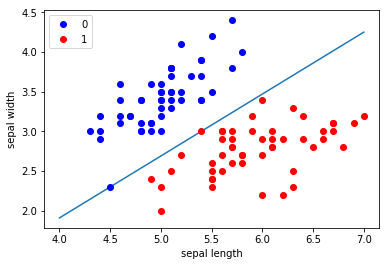

In [34]:
x = np.linspace(4,7,10)
y = -(model.w[0] * x + model.b) / model.w[1]
plt.plot(x,y)
plt.plot(data[:50,0],data[:50,1],'bo',color='blue',label='0')
plt.plot(data[50:100,0],data[50:100,1],'bo',color='red',label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [39]:
import sklearn
from sklearn.linear_model import Perceptron

In [41]:
clf = Perceptron(fit_intercept=True,max_iter=1000,shuffle=True,tol=None)
clf.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=1000, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [43]:
print(clf.coef_,clf.intercept_)

[[ 66.1 -83.3]] [-106.]


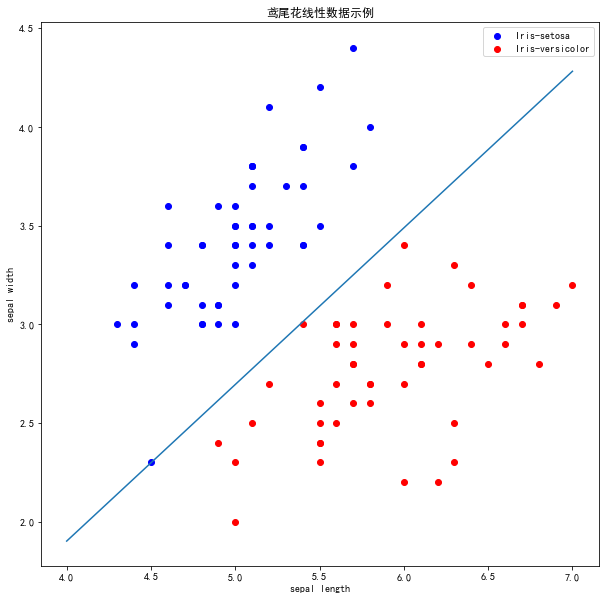

In [48]:
plt.figure(figsize=(10,10))
plt.rcParams['font.sans-serif']=['SimHei']
plt.title('鸢尾花线性数据示例')

plt.scatter(data[:50,0],data[:50,1],c='blue',label='Iris-setosa')
plt.scatter(data[50:100,0],data[50:100,1],c='red',label='Iris-versicolor')

x = np.arange(4,8)
y = -(clf.coef_[0][0]*x + clf.intercept_) / clf.coef_[0][1]

plt.plot(x,y)
# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## Chapter 3

## K nearest neighbors

### 距离度量 k值选择 分类决策规则

In [51]:
import math
from itertools import combinations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

In [54]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df[:5]

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


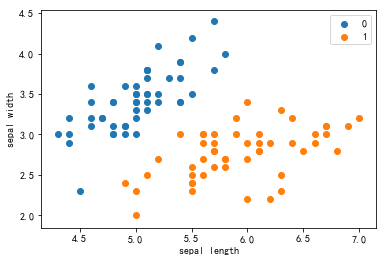

In [102]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [103]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, Y = data[:,:-1], data[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [105]:
class KNN:
    def __init__(self, X_train, Y_train, n_neighbors = 3, p=2):
        self.n = n_neighbors
        self.p = p
        self.X_train = X_train
        self.Y_train = Y_train
    def predict(self, X):
        knn_list = []
        for i in tqdm(range(self.n)):
            dist = np.linalg.norm(X-self.X_train[i],ord=self.p)
            knn_list.append((dist,self.Y_train[i]))
        for i in tqdm(range(self.n,len(self.X_train))):
            max_index = knn_list.index(max(knn_list,key=lambda x:x[0]))
            dist = np.linalg.norm(X - self.X_train[i],ord=self.p)
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist,self.Y_train[i])
        knn = [value[-1] for value in knn_list]
        count_pairs = Counter(knn)
        max_count = sorted(count_pairs.items(), key=lambda x:x[1])[-1][0]
        return max_count
    def score(self,X_test,Y_test):
        right_count = 0
        n = 10
        for X,Y in zip(X_test,Y_test):
            label = self.predict(X)
            if label == Y:
                right_count += 1
        
        return right_count / len(X_test)

In [106]:
clf = KNN(X_train,Y_train)

In [107]:
clf.score(X_test,Y_test)

100%|███████████████████████████████████████████████████████████████████████████████| 77/77 [00:00<00:00, 77226.54it/s]


1.0

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
clf_sk_nei = KNeighborsClassifier()
clf_sk_nei.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [112]:
clf_sk_nei.score(X_test,Y_test)

1.0

## Chapter 4

### naive Bayes

In [123]:
import math

In [116]:
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, :])
    # print(data)
    return data[:,:-1], data[:,-1]

In [118]:
X, Y = create_data()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [122]:
X_test[:5]

array([[5.9, 3.2, 4.8, 1.8],
       [5.7, 2.6, 3.5, 1. ],
       [5.8, 4. , 1.2, 0.2],
       [5.5, 2.4, 3.8, 1.1],
       [4.8, 3.1, 1.6, 0.2]])

### GaussianNB 高斯朴素贝叶斯

In [126]:
class NaiveBayes:
    def __init__(self):
        self.model = None
    @staticmethod
    def mean(X):
        return sum(X) / float(len(X))
    def stdev(self, X):
        avg = self.mean(X)
        return math.sqrt(sum([pow(x - avg, 2) for x in X]) / float(len(X)))
    def gaussian_probability(self, x, mean, stdev):
        exponent = math.exp(-(math.pow(x - mean, 2) /
                              (2 * math.pow(stdev, 2))))
        return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent
    def summarize(self, train_data):
        summaries = [(self.mean(i), self.stdev(i)) for i in zip(*train_data)]
        return summaries

    # 分类别求出数学期望和标准差
    def fit(self, X, Y):
        labels = list(set(Y))
        data = {label: [] for label in labels}
        for f, label in tqdm(zip(X, Y)):
            data[label].append(f)
        self.model = {
            label: self.summarize(value)
            for label, value in data.items()
        }
        return 'gaussianNB train done!'

    # 计算概率
    def calculate_probabilities(self, input_data):
        probabilities = {}
        for label, value in self.model.items():
            probabilities[label] = 1
            for i in range(len(value)):
                mean, stdev = value[i]
                probabilities[label] *= self.gaussian_probability(
                    input_data[i], mean, stdev)
        return probabilities
    # 类别
    def predict(self, X_test):
        label = sorted(
            self.calculate_probabilities(X_test).items(),
            key=lambda x: x[-1])[-1][0]
        return label

    def score(self, X_test, Y_test):
        right = 0
        for X, Y in zip(X_test, Y_test):
            label = self.predict(X)
            if label == Y:
                right += 1

        return right / float(len(X_test))

In [128]:
model = NaiveBayes()
model.fit(X_train,Y_train)

70it [00:00, ?it/s]


'gaussianNB train done!'

In [139]:
model.score(X_test,Y_test)

1.0

### 高斯 伯努利 多项式

In [135]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB, MultinomialNB
clf_Gaussian = GaussianNB()
clf_Gaussian.fit(X_train, Y_train)
clf_Gaussian.score(X_test, Y_test)

1.0

In [138]:
clf_Bernoulli = BernoulliNB()
clf_Bernoulli.fit(X_train, Y_train)
clf_Bernoulli.score(X_test, Y_test)

0.4666666666666667

In [140]:
clf_Multinomial = MultinomialNB()
clf_Multinomial.fit(X_train, Y_train)
clf_Multinomial.score(X_test, Y_test)

1.0

## Chapter 5

## 决策树

In [144]:
# page 89 Problem 5.1
def create_data():
    datas = [['青年', '否', '否', '一般', '否'],
               ['青年', '否', '否', '好', '否'],
               ['青年', '是', '否', '好', '是'],
               ['青年', '是', '是', '一般', '是'],
               ['青年', '否', '否', '一般', '否'],
               ['中年', '否', '否', '一般', '否'],
               ['中年', '否', '否', '好', '否'],
               ['中年', '是', '是', '好', '是'],
               ['中年', '否', '是', '非常好', '是'],
               ['中年', '否', '是', '非常好', '是'],
               ['老年', '否', '是', '非常好', '是'],
               ['老年', '否', '是', '好', '是'],
               ['老年', '是', '否', '好', '是'],
               ['老年', '是', '否', '非常好', '是'],
               ['老年', '否', '否', '一般', '否'],
               ]
    labels = [u'年龄', u'有工作', u'有自己的房子', u'信贷情况', u'类别']
    return datas, labels

In [146]:
datas,labels = create_data()

In [148]:
train_data = pd.DataFrame(datas,columns = labels)

In [150]:
train_data[:5]

,年龄,有工作,有自己的房子,信贷情况,类别
0,青年,否,否,一般,否
1,青年,否,否,好,否
2,青年,是,否,好,是
3,青年,是,是,一般,是
4,青年,否,否,一般,否


In [152]:
# 熵
def calc_ent(datasets):
    data_length = len(datasets)
    label_count = {}
    for i in range(data_length):
        label = datasets[i][-1]
        if label not in label_count:
            label_count[label] = 0
        label_count[label] += 1
    ent = -sum([(p / data_length) * log(p / data_length, 2)
                for p in label_count.values()])
    return ent
# 经验条件熵
def cond_ent(datasets, axis=0):
    data_length = len(datasets)
    feature_sets = {}
    for i in range(data_length):
        feature = datasets[i][axis]
        if feature not in feature_sets:
            feature_sets[feature] = []
        feature_sets[feature].append(datasets[i])
    cond_ent = sum(
        [(len(p) / data_length) * calc_ent(p) for p in feature_sets.values()])
    return cond_ent
# 信息增益
def info_gain(ent, cond_ent):
    return ent - cond_ent

def info_gain_train(datasets):
    count = len(datasets[0]) - 1
    ent = calc_ent(datasets)
    best_feature = []
    for c in range(count):
        c_info_gain = info_gain(ent, cond_ent(datasets, axis=c))
        best_feature.append((c, c_info_gain))
        print('特征({}) - info_gain - {:.3f}'.format(labels[c], c_info_gain))
    best_ = max(best_feature, key=lambda x: x[-1])
    return '特征({})的信息增益最大，选择为根节点特征'.format(labels[best_[0]])

In [155]:
from math import log
info_gain_train(np.array(datas))

特征(年龄) - info_gain - 0.083
特征(有工作) - info_gain - 0.324
特征(有自己的房子) - info_gain - 0.420
特征(信贷情况) - info_gain - 0.363


'特征(有自己的房子)的信息增益最大，选择为根节点特征'

### ID 3 决策树

In [165]:
# 定义节点类 二叉树
class Node:
    def __init__(self, root=True, label=None, feature_name=None, feature=None):
        self.root = root
        self.label = label
        self.feature_name = feature_name
        self.feature = feature
        self.tree = {}
        self.result = {
            'label:': self.label,
            'feature': self.feature,
            'tree': self.tree
        }
    def __repr__(self):
        return '{}'.format(self.result)

    def add_node(self, val, node):
        self.tree[val] = node

    def predict(self, features):
        if self.root is True:
            return self.label
        return self.tree[features[self.feature]].predict(features)

class DTree:
    def __init__(self, epsilon=0.1):
        self.epsilon = epsilon
        self._tree = {}
    # 熵
    @staticmethod
    def calc_ent(datasets):
        data_length = len(datasets)
        label_count = {}
        for i in range(data_length):
            label = datasets[i][-1]
            if label not in label_count:
                label_count[label] = 0
            label_count[label] += 1
        ent = -sum([(p / data_length) * log(p / data_length, 2)
                    for p in label_count.values()])
        return ent
    # 经验条件熵
    def cond_ent(self, datasets, axis=0):
        data_length = len(datasets)
        feature_sets = {}
        for i in range(data_length):
            feature = datasets[i][axis]
            if feature not in feature_sets:
                feature_sets[feature] = []
            feature_sets[feature].append(datasets[i])
        cond_ent = sum([(len(p) / data_length) * self.calc_ent(p)
                        for p in feature_sets.values()])
        return cond_ent
    # 信息增益
    @staticmethod
    def info_gain(ent, cond_ent):
        return ent - cond_ent
    
    def info_gain_train(self, datasets):
        count = len(datasets[0]) - 1
        ent = self.calc_ent(datasets)
        best_feature = []
        for c in range(count):
            c_info_gain = self.info_gain(ent, self.cond_ent(datasets, axis=c))
            best_feature.append((c, c_info_gain))
        # 比较大小
        best_ = max(best_feature, key=lambda x: x[-1])
        return best_

    def train(self, train_data):
        """
        input:数据集D，特征集A，阈值
        output:决策树T
        """
        _, y_train, features = train_data.iloc[:, :
                                               -1], train_data.iloc[:,
                                                                    -1], train_data.columns[:
                                                                                            -1]
        # 1,若D中实例属于同一类Ck，则T为单节点树，并将类Ck作为结点的类标记，返回T
        if len(y_train.value_counts()) == 1:
            return Node(root=True, label=y_train.iloc[0])

        # 2, 若A为空，则T为单节点树，将D中实例树最大的类Ck作为该节点的类标记，返回T
        if len(features) == 0:
            return Node(
                root=True,
                label=y_train.value_counts().sort_values(
                    ascending=False).index[0])

        # 3,计算最大信息增益 ,Ag为信息增益最大的特征
        max_feature, max_info_gain = self.info_gain_train(np.array(train_data))
        max_feature_name = features[max_feature]

        # 4,Ag的信息增益小于阈值,则置T为单节点树，并将D中是实例数最大的类Ck作为该节点的类标记，返回T
        if max_info_gain < self.epsilon:
            return Node(
                root=True,
                label=y_train.value_counts().sort_values(
                    ascending=False).index[0])

        # 5,构建Ag子集
        node_tree = Node(
            root=False, feature_name=max_feature_name, feature=max_feature)

        feature_list = train_data[max_feature_name].value_counts().index
        for f in tqdm(feature_list):
            sub_train_df = train_data.loc[train_data[max_feature_name] ==
                                          f].drop([max_feature_name], axis=1)
            # 6, 递归生成树
            sub_tree = self.train(sub_train_df)
            node_tree.add_node(f, sub_tree)
        return node_tree

    def fit(self, train_data):
        self._tree = self.train(train_data)
        return self._tree

    def predict(self, X_test):
        return self._tree.predict(X_test)

In [166]:
datas,labels = create_data()

In [167]:
df = pd.DataFrame(datas,columns=labels)

In [168]:
df.head()

,年龄,有工作,有自己的房子,信贷情况,类别
0,青年,否,否,一般,否
1,青年,否,否,好,否
2,青年,是,否,好,是
3,青年,是,是,一般,是
4,青年,否,否,一般,否


In [170]:
dt = DTree()
tree = dt.fit(df)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 87.19it/s]


In [172]:
tree

{'label:': None, 'feature': 2, 'tree': {'否': {'label:': None, 'feature': 1, 'tree': {'否': {'label:': '否', 'feature': None, 'tree': {}}, '是': {'label:': '是', 'feature': None, 'tree': {}}}}, '是': {'label:': '是', 'feature': None, 'tree': {}}}}

In [174]:
dt.predict(['老年', '否', '否', '一般'])

'否'

In [176]:
dt.predict(['老年', '是', '否', '一般'])

'是'

In [185]:
def create_data_5():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = [
        'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
    ]
    data = np.array(df.iloc[:100, [0, 1, -1]])
    return data[:, :2], data[:, -1],data
X, Y, data5 = create_data_5()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [193]:
data5[:5],X_test[:5]

(array([[5.1, 3.5, 0. ],
        [4.9, 3. , 0. ],
        [4.7, 3.2, 0. ],
        [4.6, 3.1, 0. ],
        [5. , 3.6, 0. ]]), array([[5.4, 3.7],
        [4.9, 3. ],
        [5.7, 3. ],
        [5.5, 4.2],
        [6.5, 2.8]]))

In [189]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import graphviz

In [191]:
clf_DT = DecisionTreeClassifier()
clf_DT.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [194]:
clf_DT.score(X_test,Y_test)

1.0

In [208]:
tree_pic = export_graphviz(clf_DT, out_file="./tree.pdf")

In [211]:
with open("./tree.pdf") as f:
    dot_graph = f.read()
# graphviz.Source(dot_graph)
dot_graph

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[0] <= 5.45\\ngini = 0.5\\nsamples = 80\\nvalue = [39, 41]"] ;\n1 [label="X[1] <= 2.85\\ngini = 0.25\\nsamples = 41\\nvalue = [35, 6]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[0] <= 4.7\\ngini = 0.278\\nsamples = 6\\nvalue = [1, 5]"] ;\n1 -> 2 ;\n3 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 5\\nvalue = [0, 5]"] ;\n2 -> 4 ;\n5 [label="X[1] <= 3.05\\ngini = 0.056\\nsamples = 35\\nvalue = [34, 1]"] ;\n1 -> 5 ;\n6 [label="X[0] <= 5.2\\ngini = 0.375\\nsamples = 4\\nvalue = [3, 1]"] ;\n5 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 3\\nvalue = [3, 0]"] ;\n6 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1]"] ;\n6 -> 8 ;\n9 [label="gini = 0.0\\nsamples = 31\\nvalue = [31, 0]"] ;\n5 -> 9 ;\n10 [label="X[1] <= 3.45\\ngini = 0.184\\nsamples = 39\\nvalue = [4, 35]"] ;\n0 -> 10 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n11 [label="gini = 

In [214]:
# graphviz.Source(dot_graph) #这个包有点问题，可以将上面的dot_graph以树形可视化输出

## Chapter 6

### LogisticRegression

In [216]:
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0,1,-1]])
    return data[:,:2], data[:,-1]

In [218]:
X, Y = create_data()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [220]:
X_train[:5],Y_train[:5]

(array([[5.4, 3.7],
        [5.7, 2.6],
        [4.9, 3.6],
        [6.9, 3.1],
        [4.3, 3. ]]), array([0., 1., 0., 1., 0.]))

In [225]:
class LogisticReressionClassifier:
    def __init__(self, max_iter=200, learning_rate=0.02):
        self.max_iter = max_iter
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + exp(-x))

    def data_matrix(self, X):
        data_mat = []
        for d in X:
            data_mat.append([1.0, *d])
        return data_mat

    def fit(self, X, Y):
        data_mat = self.data_matrix(X)  # m*n
        self.weights = np.zeros((len(data_mat[0]), 1), dtype=np.float32)

        for iter_ in tqdm(range(self.max_iter)):
            for i in range(len(X)):
                result = self.sigmoid(np.dot(data_mat[i], self.weights))
                error = Y[i] - result
                self.weights += self.learning_rate * error * np.transpose(
                    [data_mat[i]])
        print('LogisticRegression Model(learning_rate={},max_iter={})'.format(
            self.learning_rate, self.max_iter))

    def score(self, X_test, Y_test):
        right = 0
        X_test = self.data_matrix(X_test)
        for x, y in zip(X_test, Y_test):
            result = np.dot(x, self.weights)
            if (result > 0 and y == 1) or (result < 0 and y == 0):
                right += 1
        return right / len(X_test)

In [226]:
from math import exp

In [227]:
lr_clf = LogisticReressionClassifier()
lr_clf.fit(X_train, Y_train)

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 777.27it/s]


LogisticRegression Model(learning_rate=0.02,max_iter=200)


In [228]:
lr_clf.score(X_test,Y_test)

0.95

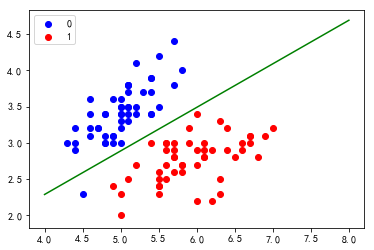

In [236]:
x_ponits = np.arange(4, 9)
y_ = -(lr_clf.weights[1]*x_ponits + lr_clf.weights[0])/lr_clf.weights[2]
plt.plot(x_ponits, y_,c='green')

plt.scatter(X[:50,0],X[:50,1],c='blue', label='0')
plt.scatter(X[50:,0],X[50:,1],c='red', label='1')
plt.legend()

In [233]:
from sklearn.linear_model import LogisticRegression

In [237]:
clf = LogisticRegression(max_iter=300)
clf.fit(X_train, Y_train)
clf.score(X_test,Y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.95

In [239]:
clf.coef_,clf.intercept_

(array([[ 2.06688863, -3.47187345]]), array([-0.38553254]))

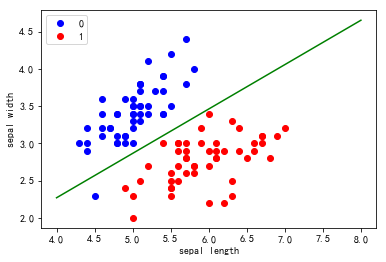

In [241]:
x_ponits = np.arange(4,9)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_, c="green")

plt.plot(X[:50, 0], X[:50, 1], 'bo', color='blue', label='0')
plt.plot(X[50:, 0], X[50:, 1], 'bo', color='red', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## Chapter 7

### support vector machine

In [244]:
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = [
        'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
    ]
    data = np.array(df.iloc[:100, [0, 1, -1]])
    for i in range(len(data)):
        if data[i, -1] == 0:
            data[i, -1] = -1
    return data[:, :2], data[:, -1]

In [264]:
X,Y = create_data()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

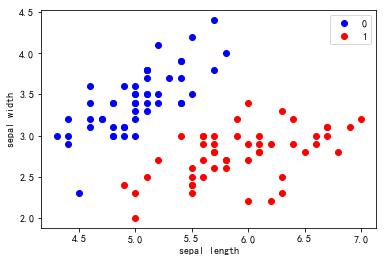

In [265]:
plt.plot(X[:50, 0], X[:50, 1], 'bo', color='blue', label='0')
plt.plot(X[50:, 0], X[50:, 1], 'bo', color='red', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [266]:
class SVM:
    def __init__(self, max_iter=100, kernel='linear'):
        self.max_iter = max_iter
        self._kernel = kernel

    def init_args(self, features, labels):
        self.m, self.n = features.shape
        self.X = features
        self.Y = labels
        self.b = 0.0
        # 将Ei保存在一个列表里
        self.alpha = np.ones(self.m)
        self.E = [self._E(i) for i in range(self.m)]
        # 松弛变量
        self.C = 1.0

    def _KKT(self, i):
        y_g = self._g(i) * self.Y[i]
        if self.alpha[i] == 0:
            return y_g >= 1
        elif 0 < self.alpha[i] < self.C:
            return y_g == 1
        else:
            return y_g <= 1

    # g(x)预测值，输入xi（X[i]）
    def _g(self, i):
        r = self.b
        for j in range(self.m):
            r += self.alpha[j] * self.Y[j] * self.kernel(self.X[i], self.X[j])
        return r

    # 核函数
    def kernel(self, x1, x2):
        if self._kernel == 'linear':
            return sum([x1[k] * x2[k] for k in range(self.n)])
        elif self._kernel == 'poly':
            return (sum([x1[k] * x2[k] for k in range(self.n)]) + 1)**2

        return 0

    # E（x）为g(x)对输入x的预测值和y的差
    def _E(self, i):
        return self._g(i) - self.Y[i]

    def _init_alpha(self):
        # 外层循环首先遍历所有满足0<a<C的样本点，检验是否满足KKT
        index_list = [i for i in range(self.m) if 0 < self.alpha[i] < self.C]
        # 否则遍历整个训练集
        non_satisfy_list = [i for i in range(self.m) if i not in index_list]
        index_list.extend(non_satisfy_list)

        for i in index_list:
            if self._KKT(i):
                continue
            E1 = self.E[i]
            # 如果E2是+，选择最小的；如果E2是负的，选择最大的
            if E1 >= 0:
                j = min(range(self.m), key=lambda x: self.E[x])
            else:
                j = max(range(self.m), key=lambda x: self.E[x])
            return i, j

    def _compare(self, _alpha, L, H):
        if _alpha > H:
            return H
        elif _alpha < L:
            return L
        else:
            return _alpha

    def fit(self, features, labels):
        self.init_args(features, labels)
        for t in tqdm(range(self.max_iter)):
            # train
            i1, i2 = self._init_alpha()
            # 边界
            if self.Y[i1] == self.Y[i2]:
                L = max(0, self.alpha[i1] + self.alpha[i2] - self.C)
                H = min(self.C, self.alpha[i1] + self.alpha[i2])
            else:
                L = max(0, self.alpha[i2] - self.alpha[i1])
                H = min(self.C, self.C + self.alpha[i2] - self.alpha[i1])

            E1 = self.E[i1]
            E2 = self.E[i2]
            # eta=K11+K22-2K12
            eta = self.kernel(self.X[i1], self.X[i1]) + self.kernel(self.X[i2],
                self.X[i2]) - 2 * self.kernel(self.X[i1], self.X[i2])
            if eta <= 0:
                continue

            alpha2_new_unc = self.alpha[i2] + self.Y[i2] * (E1 - E2) / eta  
            #此处有修改，根据书上应该是E1 - E2，书上130-131页
            alpha2_new = self._compare(alpha2_new_unc, L, H)
            alpha1_new = self.alpha[i1] + self.Y[i1] * self.Y[i2] * (
                self.alpha[i2] - alpha2_new)

            b1_new = -E1 - self.Y[i1] * self.kernel(self.X[i1], self.X[i1]) * (
                alpha1_new - self.alpha[i1]) - self.Y[i2] * self.kernel(
                    self.X[i2],
                    self.X[i1]) * (alpha2_new - self.alpha[i2]) + self.b
            b2_new = -E2 - self.Y[i1] * self.kernel(self.X[i1], self.X[i2]) * (
                alpha1_new - self.alpha[i1]) - self.Y[i2] * self.kernel(
                    self.X[i2],
                    self.X[i2]) * (alpha2_new - self.alpha[i2]) + self.b

            if 0 < alpha1_new < self.C:
                b_new = b1_new
            elif 0 < alpha2_new < self.C:
                b_new = b2_new
            else:
                # 选择中点
                b_new = (b1_new + b2_new) / 2
            # 更新参数
            self.alpha[i1] = alpha1_new
            self.alpha[i2] = alpha2_new
            self.b = b_new

            self.E[i1] = self._E(i1)
            self.E[i2] = self._E(i2)
        return 'train done!'

    def predict(self, data):
        r = self.b
        for i in range(self.m):
            r += self.alpha[i] * self.Y[i] * self.kernel(data, self.X[i])
        return 1 if r > 0 else -1

    def score(self, X_test, y_test):
        right_count = 0
        for i in range(len(X_test)):
            result = self.predict(X_test[i])
            if result == y_test[i]:
                right_count += 1
        return right_count / len(X_test)

    def _weight(self):
        # linear model
        yx = self.Y.reshape(-1, 1) * self.X
        self.w = np.dot(yx.T, self.alpha)
        return self.w

In [267]:
svm = SVM(max_iter=600)
svm.fit(X_train,Y_train)

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:00<00:00, 733.66it/s]


'train done!'

In [269]:
svm.score(X_test,Y_test)

0.6333333333333333

In [280]:
from sklearn.svm import SVC
clf7 = SVC(gamma='auto',kernel='linear')
clf7.fit(X_train, Y_train)
clf7.score(X_test, Y_test)

1.0

## Chapter 8

### Boost eg:AdaBoost etc.

In [281]:
X, Y = create_data()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

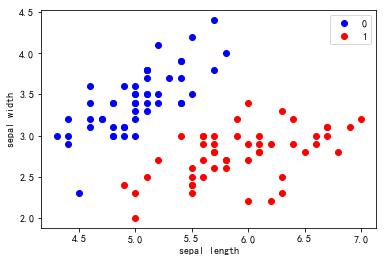

In [283]:
plt.plot(X[:50, 0], X[:50, 1], 'bo', color='blue', label='0')
plt.plot(X[50:, 0], X[50:, 1], 'bo', color='red', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [295]:
class AdaBoost:
    def __init__(self, n_estimators=50, learning_rate=0.01):
        self.clf_num = n_estimators
        self.learning_rate = learning_rate

    def init_args(self, datasets, labels):

        self.X = datasets
        self.Y = labels
        self.M, self.N = datasets.shape

        # 弱分类器数目和集合
        self.clf_sets = []

        # 初始化weights
        self.weights = [1.0 / self.M] * self.M

        # G(x)系数 alpha
        self.alpha = []

    def _G(self, features, labels, weights):
        m = len(features)
        error = 100000.0  # 无穷大
        best_v = 0.0
        # 单维features
        features_min = min(features)
        features_max = max(features)
        n_step = (features_max - features_min +
                  self.learning_rate) // self.learning_rate
        direct, compare_array = None, None
        for i in range(1, int(n_step)):
            v = features_min + self.learning_rate * i
            if v not in features:
                # 误分类计算
                compare_array_positive = np.array(
                    [1 if features[k] > v else -1 for k in range(m)])
                weight_error_positive = sum([
                    weights[k] for k in range(m)
                    if compare_array_positive[k] != labels[k]
                ])

                compare_array_nagetive = np.array(
                    [-1 if features[k] > v else 1 for k in range(m)])
                weight_error_nagetive = sum([
                    weights[k] for k in range(m)
                    if compare_array_nagetive[k] != labels[k]
                ])

                if weight_error_positive < weight_error_nagetive:
                    weight_error = weight_error_positive
                    _compare_array = compare_array_positive
                    direct = 'positive'
                else:
                    weight_error = weight_error_nagetive
                    _compare_array = compare_array_nagetive
                    direct = 'nagetive'

                if weight_error < error:
                    error = weight_error
                    compare_array = _compare_array
                    best_v = v
        return best_v, direct, error, compare_array

    # 计算alpha
    def _alpha(self, error):
        return 0.5 * np.log((1 - error) / error)

    # 规范化因子
    def _Z(self, weights, a, clf):
        return sum([
            weights[i] * np.exp(-1 * a * self.Y[i] * clf[i])
            for i in range(self.M)
        ])

    # 权值更新
    def _w(self, a, clf, Z):
        for i in range(self.M):
            self.weights[i] = self.weights[i] * np.exp(
                -1 * a * self.Y[i] * clf[i]) / Z

    def G(self, x, v, direct):
        if direct == 'positive':
            return 1 if x > v else -1
        else:
            return -1 if x > v else 1

    def fit(self, X, y):
        self.init_args(X, y)
        for epoch in tqdm(range(self.clf_num)):
            best_clf_error, best_v, clf_result = 100000, None, None
            # 根据特征维度, 选择误差最小的
            for j in range(self.N):
                features = self.X[:, j]
                # 分类阈值，分类误差，分类结果
                v, direct, error, compare_array = self._G(
                    features, self.Y, self.weights)

                if error < best_clf_error:
                    best_clf_error = error
                    best_v = v
                    final_direct = direct
                    clf_result = compare_array
                    axis = j
                if best_clf_error == 0:
                    break
            # 计算G(x)系数a
            a = self._alpha(best_clf_error)
            self.alpha.append(a)
            # 记录分类器
            self.clf_sets.append((axis, best_v, final_direct))
            # 规范化因子
            Z = self._Z(self.weights, a, clf_result)
            # 权值更新
            self._w(a, clf_result, Z)

    def predict(self, feature):
        result = 0.0
        for i in range(len(self.clf_sets)):
            axis, clf_v, direct = self.clf_sets[i]
            f_input = feature[axis]
            result += self.alpha[i] * self.G(f_input, clf_v, direct)
        # sign函数
        return 1 if result > 0 else -1

    def score(self, X_test, Y_test):
        right_count = 0
        for i in range(len(X_test)):
            feature = X_test[i]
            if self.predict(feature) == Y_test[i]:
                right_count += 1
        return right_count / len(X_test)

In [288]:
clf = AdaBoost(n_estimators=10, learning_rate=0.01)
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.98it/s]


0.9

In [294]:
result = []
for i in range(1, 11):
    X, Y = create_data()
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    clf = AdaBoost(n_estimators=10, learning_rate=0.01)
    clf.fit(X_train, Y_train)
    r = clf.score(X_test, Y_test)
    print('{}/10 score：{}'.format(i, r))
    result.append(r)
print('average score:{}'.format(sum(result)/10))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.03it/s]


1/10 score：0.9


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.11it/s]


2/10 score：0.8


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.76it/s]


3/10 score：0.75


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.66it/s]


4/10 score：0.65


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.65it/s]


5/10 score：0.9


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.49it/s]


6/10 score：0.35


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.51it/s]


7/10 score：0.85


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.90it/s]


8/10 score：0.55


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.73it/s]


9/10 score：0.6


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.42it/s]


10/10 score：0.7
average score:0.7049999999999998


In [293]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=10, learning_rate=0.5)
clf.fit(X_train, Y_train)
clf.score(X_test,Y_test)

0.95

## Chapter 9

### EM(Expectation Maximization algorithm)

In [297]:
pro_A, pro_B, por_C = 0.5, 0.5, 0.5

def pmf(i, pro_A, pro_B, por_C):
    pro_1 = pro_A * math.pow(pro_B, data[i]) * math.pow(
        (1 - pro_B), 1 - data[i])
    pro_2 = pro_A * math.pow(pro_C, data[i]) * math.pow(
        (1 - pro_C), 1 - data[i])
    return pro_1 / (pro_1 + pro_2)

In [299]:
class EM:
    def __init__(self, prob):
        self.pro_A, self.pro_B, self.pro_C = prob
    # e_step
    def pmf(self, i):
        pro_1 = self.pro_A * math.pow(self.pro_B, data[i]) * math.pow(
            (1 - self.pro_B), 1 - data[i])
        pro_2 = (1 - self.pro_A) * math.pow(self.pro_C, data[i]) * math.pow(
            (1 - self.pro_C), 1 - data[i])
        return pro_1 / (pro_1 + pro_2)
    # m_step
    def fit(self, data):
        count = len(data)
        print('init prob:{}, {}, {}'.format(self.pro_A, self.pro_B, self.pro_C))
        for d in tqdm(range(count)):
            _ = yield
            _pmf = [self.pmf(k) for k in range(count)]
            pro_A = 1 / count * sum(_pmf)
            pro_B = sum([_pmf[k] * data[k] for k in range(count)]) / sum(
                [_pmf[k] for k in range(count)])
            pro_C = sum([(1 - _pmf[k]) * data[k]
                         for k in range(count)]) / sum([(1 - _pmf[k])
                                                        for k in range(count)])
            print('{}/{}  pro_a:{:.3f}, pro_b:{:.3f}, pro_c:{:.3f}'.format(
                d + 1, count, pro_A, pro_B, pro_C))
            self.pro_A = pro_A
            self.pro_B = pro_B
            self.pro_C = pro_C

In [321]:
data=[1,1,0,1,0,0,1,0,1,1]
em = EM(prob=[0.5, 0.5, 0.5])
f = em.fit(data)
next(f)

init prob:0.5, 0.5, 0.5



  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

In [322]:
for i in range(9):
    f.send(1)

1/10  pro_a:0.500, pro_b:0.600, pro_c:0.600



 10%|████████▎                                                                          | 1/10 [00:02<00:23,  2.56s/it]

2/10  pro_a:0.500, pro_b:0.600, pro_c:0.600
3/10  pro_a:0.500, pro_b:0.600, pro_c:0.600
4/10  pro_a:0.500, pro_b:0.600, pro_c:0.600
5/10  pro_a:0.500, pro_b:0.600, pro_c:0.600
6/10  pro_a:0.500, pro_b:0.600, pro_c:0.600
7/10  pro_a:0.500, pro_b:0.600, pro_c:0.600
8/10  pro_a:0.500, pro_b:0.600, pro_c:0.600
9/10  pro_a:0.500, pro_b:0.600, pro_c:0.600


## Chapter 10

### HMM

In [323]:
class HiddenMarkov:
    def forward(self, Q, V, A, B, O, PI):  # 使用前向算法
        N = len(Q)  #可能存在的状态数量
        M = len(O)  # 观测序列的大小
        alphas = np.zeros((N, M))  # alpha值
        T = M  # 有几个时刻，有几个观测序列，就有几个时刻
        for t in range(T):  # 遍历每一时刻，算出alpha值
            indexOfO = V.index(O[t])  # 找出序列对应的索引
            for i in range(N):
                if t == 0:  # 计算初值
                    alphas[i][t] = PI[t][i] * B[i][indexOfO]  # P176（10.15）
                    print(
                        'alpha1(%d)=p%db%db(o1)=%f' % (i, i, i, alphas[i][t]))
                else:
                    alphas[i][t] = np.dot(
                        [alpha[t - 1] for alpha in alphas],
                        [a[i] for a in A]) * B[i][indexOfO]  # 对应P176（10.16）
                    print('alpha%d(%d)=[sigma alpha%d(i)ai%d]b%d(o%d)=%f' %
                          (t, i, t - 1, i, i, t, alphas[i][t]))
                    # print(alphas)
        P = np.sum([alpha[M - 1] for alpha in alphas])  # P176(10.17)

    def backward(self, Q, V, A, B, O, PI):  # 后向算法
        N = len(Q)  # 可能存在的状态数量
        M = len(O)  # 观测序列的大小
        betas = np.ones((N, M))  # beta
        for i in range(N):
            print('beta%d(%d)=1' % (M, i))
        for t in range(M - 2, -1, -1):
            indexOfO = V.index(O[t + 1])  # 找出序列对应的索引
            for i in range(N):
                betas[i][t] = np.dot(
                    np.multiply(A[i], [b[indexOfO] for b in B]),
                    [beta[t + 1] for beta in betas])
                realT = t + 1
                realI = i + 1
                print(
                    'beta%d(%d)=[sigma a%djbj(o%d)]beta%d(j)=(' %
                    (realT, realI, realI, realT + 1, realT + 1),
                    end='')
                for j in range(N):
                    print(
                        "%.2f*%.2f*%.2f+" % (A[i][j], B[j][indexOfO],
                                             betas[j][t + 1]),
                        end='')
                print("0)=%.3f" % betas[i][t])
        indexOfO = V.index(O[0])
        P = np.dot(
            np.multiply(PI, [b[indexOfO] for b in B]),
            [beta[0] for beta in betas])
        print("P(O|lambda)=", end="")
        for i in range(N):
            print(
                "%.1f*%.1f*%.5f+" % (PI[0][i], B[i][indexOfO], betas[i][0]),
                end="")
        print("0=%f" % P)

    def viterbi(self, Q, V, A, B, O, PI):
        N = len(Q)  #可能存在的状态数量
        M = len(O)  # 观测序列的大小
        deltas = np.zeros((N, M))
        psis = np.zeros((N, M))
        I = np.zeros((1, M))
        for t in range(M):
            realT = t + 1
            indexOfO = V.index(O[t])  # 找出序列对应的索引
            for i in range(N):
                realI = i + 1
                if t == 0:
                    deltas[i][t] = PI[0][i] * B[i][indexOfO]
                    psis[i][t] = 0
                    print('delta1(%d)=pi%d * b%d(o1)=%.2f * %.2f=%.2f' %
                          (realI, realI, realI, PI[0][i], B[i][indexOfO],
                           deltas[i][t]))
                    print('psis1(%d)=0' % (realI))
                else:
                    deltas[i][t] = np.max(
                        np.multiply([delta[t - 1] for delta in deltas],
                                    [a[i] for a in A])) * B[i][indexOfO]
                    print(
                        'delta%d(%d)=max[delta%d(j)aj%d]b%d(o%d)=%.2f*%.2f=%.5f'
                        % (realT, realI, realT - 1, realI, realI, realT,
                           np.max(
                               np.multiply([delta[t - 1] for delta in deltas],
                                           [a[i] for a in A])), B[i][indexOfO],
                           deltas[i][t]))
                    psis[i][t] = np.argmax(
                        np.multiply(
                            [delta[t - 1] for delta in deltas],
                            [a[i]
                             for a in A])) + 1  #由于其返回的是索引，因此应+1才能和正常的下标值相符合。
                    print('psis%d(%d)=argmax[delta%d(j)aj%d]=%d' %
                          (realT, realI, realT - 1, realI, psis[i][t]))
        I[0][M - 1] = np.argmax([delta[M - 1] for delta in deltas
                                 ]) + 1  #由于其返回的是索引，因此应+1才能和正常的下标值相符合。
        print('i%d=argmax[deltaT(i)]=%d' % (M, I[0][M - 1]))
        for t in range(M - 2, -1, -1):
            I[0][t] = psis[int(I[0][t + 1]) - 1][t + 1]
            print('i%d=psis%d(i%d)=%d' % (t + 1, t + 2, t + 2, I[0][t]))
        print("状态序列I：", I)

#### eg: Problem 10.1

In [325]:
Q = [1, 2, 3]
V = ['红', '白']
A = [[0.5, 0.2, 0.3], [0.3, 0.5, 0.2], [0.2, 0.3, 0.5]]
B = [[0.5, 0.5], [0.4, 0.6], [0.7, 0.3]]
O = ['红', '白', '红', '白']
PI = [[0.2, 0.4, 0.4]]

In [327]:
HMM = HiddenMarkov()
HMM.viterbi(Q, V, A, B, O, PI)

delta1(1)=pi1 * b1(o1)=0.20 * 0.50=0.10
psis1(1)=0
delta1(2)=pi2 * b2(o1)=0.40 * 0.40=0.16
psis1(2)=0
delta1(3)=pi3 * b3(o1)=0.40 * 0.70=0.28
psis1(3)=0
delta2(1)=max[delta1(j)aj1]b1(o2)=0.06*0.50=0.02800
psis2(1)=argmax[delta1(j)aj1]=3
delta2(2)=max[delta1(j)aj2]b2(o2)=0.08*0.60=0.05040
psis2(2)=argmax[delta1(j)aj2]=3
delta2(3)=max[delta1(j)aj3]b3(o2)=0.14*0.30=0.04200
psis2(3)=argmax[delta1(j)aj3]=3
delta3(1)=max[delta2(j)aj1]b1(o3)=0.02*0.50=0.00756
psis3(1)=argmax[delta2(j)aj1]=2
delta3(2)=max[delta2(j)aj2]b2(o3)=0.03*0.40=0.01008
psis3(2)=argmax[delta2(j)aj2]=2
delta3(3)=max[delta2(j)aj3]b3(o3)=0.02*0.70=0.01470
psis3(3)=argmax[delta2(j)aj3]=3
delta4(1)=max[delta3(j)aj1]b1(o4)=0.00*0.50=0.00189
psis4(1)=argmax[delta3(j)aj1]=1
delta4(2)=max[delta3(j)aj2]b2(o4)=0.01*0.60=0.00302
psis4(2)=argmax[delta3(j)aj2]=2
delta4(3)=max[delta3(j)aj3]b3(o4)=0.01*0.30=0.00220
psis4(3)=argmax[delta3(j)aj3]=3
i4=argmax[deltaT(i)]=2
i3=psis4(i4)=2
i2=psis3(i3)=2
i1=psis2(i2)=3
状态序列I： [[3. 2. 2. 2.]]


## Chapter 11

### CRF

eg：Keras中的CRF实现(backend tensorflow)

In [350]:
from keras import backend as K
from keras import activations
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.layers import Layer
from keras.layers import InputSpec

from keras_contrib.losses import crf_loss
from keras_contrib.metrics import crf_marginal_accuracy
from keras_contrib.metrics import crf_viterbi_accuracy
from keras_contrib.utils.test_utils import to_tuple

class CRF(Layer):
    """
    # Input shape
        3D tensor with shape `(nb_samples, timesteps, input_dim)`.
    # Output shape
        3D tensor with shape `(nb_samples, timesteps, units)`.
    # Masking
        This layer supports masking for input data with a variable number
        of timesteps. To introduce masks to your data,
        use an [Embedding](embeddings.md) layer with the `mask_zero` parameter
        set to `True`.
    """
    def __init__(self, units,
                 learn_mode='join',
                 test_mode=None,
                 sparse_target=False,
                 use_boundary=True,
                 use_bias=True,
                 activation='linear',
                 kernel_initializer='glorot_uniform',
                 chain_initializer='orthogonal',
                 bias_initializer='zeros',
                 boundary_initializer='zeros',
                 kernel_regularizer=None,
                 chain_regularizer=None,
                 boundary_regularizer=None,
                 bias_regularizer=None,
                 kernel_constraint=None,
                 chain_constraint=None,
                 boundary_constraint=None,
                 bias_constraint=None,
                 input_dim=None,
                 unroll=False,
                 **kwargs):
        super(CRF, self).__init__(**kwargs)
        self.supports_masking = True
        self.units = units
        self.learn_mode = learn_mode
        assert self.learn_mode in ['join', 'marginal']
        self.test_mode = test_mode
        if self.test_mode is None:
            self.test_mode = 'viterbi' if self.learn_mode == 'join' else 'marginal'
        else:
            assert self.test_mode in ['viterbi', 'marginal']
        self.sparse_target = sparse_target
        self.use_boundary = use_boundary
        self.use_bias = use_bias

        self.activation = activations.get(activation)

        self.kernel_initializer = initializers.get(kernel_initializer)
        self.chain_initializer = initializers.get(chain_initializer)
        self.boundary_initializer = initializers.get(boundary_initializer)
        self.bias_initializer = initializers.get(bias_initializer)

        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.chain_regularizer = regularizers.get(chain_regularizer)
        self.boundary_regularizer = regularizers.get(boundary_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)

        self.kernel_constraint = constraints.get(kernel_constraint)
        self.chain_constraint = constraints.get(chain_constraint)
        self.boundary_constraint = constraints.get(boundary_constraint)
        self.bias_constraint = constraints.get(bias_constraint)

        self.unroll = unroll

    def build(self, input_shape):
        input_shape = to_tuple(input_shape)
        self.input_spec = [InputSpec(shape=input_shape)]
        self.input_dim = input_shape[-1]

        self.kernel = self.add_weight(shape=(self.input_dim, self.units),
                                      name='kernel',
                                      initializer=self.kernel_initializer,
                                      regularizer=self.kernel_regularizer,
                                      constraint=self.kernel_constraint)
        self.chain_kernel = self.add_weight(shape=(self.units, self.units),
                                            name='chain_kernel',
                                            initializer=self.chain_initializer,
                                            regularizer=self.chain_regularizer,
                                            constraint=self.chain_constraint)
        if self.use_bias:
            self.bias = self.add_weight(shape=(self.units,),
                                        name='bias',
                                        initializer=self.bias_initializer,
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
        else:
            self.bias = 0

        if self.use_boundary:
            self.left_boundary = self.add_weight(shape=(self.units,),
                                                 name='left_boundary',
                                                 initializer=self.boundary_initializer,
                                                 regularizer=self.boundary_regularizer,
                                                 constraint=self.boundary_constraint)
            self.right_boundary = self.add_weight(shape=(self.units,),
                                                  name='right_boundary',
                                                  initializer=self.boundary_initializer,
                                                  regularizer=self.boundary_regularizer,
                                                  constraint=self.boundary_constraint)
        self.built = True

    def call(self, X, mask=None):
        if mask is not None:
            assert K.ndim(mask) == 2, 'Input mask to CRF must have dim 2 if not None'

        if self.test_mode == 'viterbi':
            test_output = self.viterbi_decoding(X, mask)
        else:
            test_output = self.get_marginal_prob(X, mask)

        self.uses_learning_phase = True
        if self.learn_mode == 'join':
            train_output = K.zeros_like(K.dot(X, self.kernel))
            out = K.in_train_phase(train_output, test_output)
        else:
            if self.test_mode == 'viterbi':
                train_output = self.get_marginal_prob(X, mask)
                out = K.in_train_phase(train_output, test_output)
            else:
                out = test_output
        return out

    def compute_output_shape(self, input_shape):
        return input_shape[:2] + (self.units,)

    def compute_mask(self, input, mask=None):
        if mask is not None and self.learn_mode == 'join':
            return K.any(mask, axis=1)
        return mask

    def get_config(self):
        config = {
            'units': self.units,
            'learn_mode': self.learn_mode,
            'test_mode': self.test_mode,
            'use_boundary': self.use_boundary,
            'use_bias': self.use_bias,
            'sparse_target': self.sparse_target,
            'kernel_initializer': initializers.serialize(self.kernel_initializer),
            'chain_initializer': initializers.serialize(self.chain_initializer),
            'boundary_initializer': initializers.serialize(
                self.boundary_initializer),
            'bias_initializer': initializers.serialize(self.bias_initializer),
            'activation': activations.serialize(self.activation),
            'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
            'chain_regularizer': regularizers.serialize(self.chain_regularizer),
            'boundary_regularizer': regularizers.serialize(
                self.boundary_regularizer),
            'bias_regularizer': regularizers.serialize(self.bias_regularizer),
            'kernel_constraint': constraints.serialize(self.kernel_constraint),
            'chain_constraint': constraints.serialize(self.chain_constraint),
            'boundary_constraint': constraints.serialize(self.boundary_constraint),
            'bias_constraint': constraints.serialize(self.bias_constraint),
            'input_dim': self.input_dim,
            'unroll': self.unroll}
        base_config = super(CRF, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    @property
    def loss_function(self):
        warnings.warn('CRF.loss_function is deprecated '
                      'and it might be removed in the future. Please '
                      'use losses.crf_loss instead.')
        return crf_loss

    @property
    def accuracy(self):
        warnings.warn('CRF.accuracy is deprecated and it '
                      'might be removed in the future. Please '
                      'use metrics.crf_accuracy')
        if self.test_mode == 'viterbi':
            return crf_viterbi_accuracy
        else:
            return crf_marginal_accuracy

    @property
    def viterbi_acc(self):
        warnings.warn('CRF.viterbi_acc is deprecated and it might '
                      'be removed in the future. Please '
                      'use metrics.viterbi_acc instead.')
        return crf_viterbi_accuracy

    @property
    def marginal_acc(self):
        warnings.warn('CRF.moarginal_acc is deprecated and it '
                      'might be removed in the future. Please '
                      'use metrics.marginal_acc instead.')
        return crf_marginal_accuracy

    @staticmethod
    def softmaxNd(x, axis=-1):
        m = K.max(x, axis=axis, keepdims=True)
        exp_x = K.exp(x - m)
        prob_x = exp_x / K.sum(exp_x, axis=axis, keepdims=True)
        return prob_x

    @staticmethod
    def shift_left(x, offset=1):
        assert offset > 0
        return K.concatenate([x[:, offset:], K.zeros_like(x[:, :offset])], axis=1)

    @staticmethod
    def shift_right(x, offset=1):
        assert offset > 0
        return K.concatenate([K.zeros_like(x[:, :offset]), x[:, :-offset]], axis=1)

    def add_boundary_energy(self, energy, mask, start, end):
        start = K.expand_dims(K.expand_dims(start, 0), 0)
        end = K.expand_dims(K.expand_dims(end, 0), 0)
        if mask is None:
            energy = K.concatenate([energy[:, :1, :] + start, energy[:, 1:, :]],
                                   axis=1)
            energy = K.concatenate([energy[:, :-1, :], energy[:, -1:, :] + end],
                                   axis=1)
        else:
            mask = K.expand_dims(K.cast(mask, K.floatx()))
            start_mask = K.cast(K.greater(mask, self.shift_right(mask)), K.floatx())
            end_mask = K.cast(K.greater(self.shift_left(mask), mask), K.floatx())
            energy = energy + start_mask * start
            energy = energy + end_mask * end
        return energy

    def get_log_normalization_constant(self, input_energy, mask, **kwargs):
        """Compute logarithm of the normalization constant Z, where
        Z = sum exp(-E) -> logZ = log sum exp(-E) =: -nlogZ
        """
        # should have logZ[:, i] == logZ[:, j] for any i, j
        logZ = self.recursion(input_energy, mask, return_sequences=False, **kwargs)
        return logZ[:, 0]

    def get_energy(self, y_true, input_energy, mask):
        """Energy = a1' y1 + u1' y1 + y1' U y2 + u2' y2 + y2' U y3 + u3' y3 + an' y3
        """
        input_energy = K.sum(input_energy * y_true, 2)  # (B, T)
        # (B, T-1)
        chain_energy = K.sum(K.dot(y_true[:, :-1, :],
                                   self.chain_kernel) * y_true[:, 1:, :], 2)

        if mask is not None:
            mask = K.cast(mask, K.floatx())
            # (B, T-1), mask[:,:-1]*mask[:,1:] makes it work with any padding
            chain_mask = mask[:, :-1] * mask[:, 1:]
            input_energy = input_energy * mask
            chain_energy = chain_energy * chain_mask
        total_energy = K.sum(input_energy, -1) + K.sum(chain_energy, -1)  # (B, )

        return total_energy

    def get_negative_log_likelihood(self, y_true, X, mask):
        """Compute the loss, i.e., negative log likelihood (normalize by number of time steps)
           likelihood = 1/Z * exp(-E) ->  neg_log_like = - log(1/Z * exp(-E)) = logZ + E
        """
        input_energy = self.activation(K.dot(X, self.kernel) + self.bias)
        if self.use_boundary:
            input_energy = self.add_boundary_energy(input_energy, mask,
                                                    self.left_boundary,
                                                    self.right_boundary)
        energy = self.get_energy(y_true, input_energy, mask)
        logZ = self.get_log_normalization_constant(input_energy, mask,
                                                   input_length=K.int_shape(X)[1])
        nloglik = logZ + energy
        if mask is not None:
            nloglik = nloglik / K.sum(K.cast(mask, K.floatx()), 1)
        else:
            nloglik = nloglik / K.cast(K.shape(X)[1], K.floatx())
        return nloglik

    def step(self, input_energy_t, states, return_logZ=True):
        # not in the following  `prev_target_val` has shape = (B, F)
        # where B = batch_size, F = output feature dim
        # Note: `i` is of float32, due to the behavior of `K.rnn`
        prev_target_val, i, chain_energy = states[:3]
        t = K.cast(i[0, 0], dtype='int32')
        if len(states) > 3:
            if K.backend() == 'theano':
                m = states[3][:, t:(t + 2)]
            else:
                m = K.slice(states[3], [0, t], [-1, 2])
            input_energy_t = input_energy_t * K.expand_dims(m[:, 0])
            # (1, F, F)*(B, 1, 1) -> (B, F, F)
            chain_energy = chain_energy * K.expand_dims(
                K.expand_dims(m[:, 0] * m[:, 1]))
        if return_logZ:
            # shapes: (1, B, F) + (B, F, 1) -> (B, F, F)
            energy = chain_energy + K.expand_dims(input_energy_t - prev_target_val, 2)
            new_target_val = K.logsumexp(-energy, 1)  # shapes: (B, F)
            return new_target_val, [new_target_val, i + 1]
        else:
            energy = chain_energy + K.expand_dims(input_energy_t + prev_target_val, 2)
            min_energy = K.min(energy, 1)
            # cast for tf-version `K.rnn
            argmin_table = K.cast(K.argmin(energy, 1), K.floatx())
            return argmin_table, [min_energy, i + 1]

    def recursion(self, input_energy, mask=None, go_backwards=False,
                  return_sequences=True, return_logZ=True, input_length=None):
        chain_energy = self.chain_kernel
        # shape=(1, F, F): F=num of output features. 1st F is for t-1, 2nd F for t
        chain_energy = K.expand_dims(chain_energy, 0)
        # shape=(B, F), dtype=float32
        prev_target_val = K.zeros_like(input_energy[:, 0, :])

        if go_backwards:
            input_energy = K.reverse(input_energy, 1)
            if mask is not None:
                mask = K.reverse(mask, 1)

        initial_states = [prev_target_val, K.zeros_like(prev_target_val[:, :1])]
        constants = [chain_energy]

        if mask is not None:
            mask2 = K.cast(K.concatenate([mask, K.zeros_like(mask[:, :1])], axis=1),
                           K.floatx())
            constants.append(mask2)

        def _step(input_energy_i, states):
            return self.step(input_energy_i, states, return_logZ)

        target_val_last, target_val_seq, _ = K.rnn(_step, input_energy,
                                                   initial_states,
                                                   constants=constants,
                                                   input_length=input_length,
                                                   unroll=self.unroll)

        if return_sequences:
            if go_backwards:
                target_val_seq = K.reverse(target_val_seq, 1)
            return target_val_seq
        else:
            return target_val_last

    def forward_recursion(self, input_energy, **kwargs):
        return self.recursion(input_energy, **kwargs)

    def backward_recursion(self, input_energy, **kwargs):
        return self.recursion(input_energy, go_backwards=True, **kwargs)

    def get_marginal_prob(self, X, mask=None):
        input_energy = self.activation(K.dot(X, self.kernel) + self.bias)
        if self.use_boundary:
            input_energy = self.add_boundary_energy(input_energy, mask,
                                                    self.left_boundary,
                                                    self.right_boundary)
        input_length = K.int_shape(X)[1]
        alpha = self.forward_recursion(input_energy, mask=mask,
                                       input_length=input_length)
        beta = self.backward_recursion(input_energy, mask=mask,
                                       input_length=input_length)
        if mask is not None:
            input_energy = input_energy * K.expand_dims(K.cast(mask, K.floatx()))
        margin = -(self.shift_right(alpha) + input_energy + self.shift_left(beta))
        return self.softmaxNd(margin)

    def viterbi_decoding(self, X, mask=None):
        input_energy = self.activation(K.dot(X, self.kernel) + self.bias)
        if self.use_boundary:
            input_energy = self.add_boundary_energy(
                input_energy, mask, self.left_boundary, self.right_boundary)

        argmin_tables = self.recursion(input_energy, mask, return_logZ=False)
        argmin_tables = K.cast(argmin_tables, 'int32')

        # backward to find best path, `initial_best_idx` can be any,
        # as all elements in the last argmin_table are the same
        argmin_tables = K.reverse(argmin_tables, 1)
        # matrix instead of vector is required by tf `K.rnn`
        initial_best_idx = [K.expand_dims(argmin_tables[:, 0, 0])]
        if K.backend() == 'theano':
            from theano import tensor as T
            initial_best_idx = [T.unbroadcast(initial_best_idx[0], 1)]

        def gather_each_row(params, indices):
            n = K.shape(indices)[0]
            if K.backend() == 'theano':
                from theano import tensor as T
                return params[T.arange(n), indices]
            elif K.backend() == 'tensorflow':
                import tensorflow as tf
                indices = K.transpose(K.stack([tf.range(n), indices]))
                return tf.gather_nd(params, indices)
            else:
                raise NotImplementedError

        def find_path(argmin_table, best_idx):
            next_best_idx = gather_each_row(argmin_table, best_idx[0][:, 0])
            next_best_idx = K.expand_dims(next_best_idx)
            if K.backend() == 'theano':
                from theano import tensor as T
                next_best_idx = T.unbroadcast(next_best_idx, 1)
            return next_best_idx, [next_best_idx]

        _, best_paths, _ = K.rnn(find_path, argmin_tables, initial_best_idx,
                                 input_length=K.int_shape(X)[1], unroll=self.unroll)
        best_paths = K.reverse(best_paths, 1)
        best_paths = K.squeeze(best_paths, 2)

        return K.one_hot(best_paths, self.units)

In [349]:
from keras_contrib.layers import CRF
from keras_contrib.losses import crf_loss
from keras_contrib.metrics import crf_viterbi_accuracy
model = Sequential()
model.add(Embedding(3001, 300, mask_zero=True)(X)
cls_crf= CRF(10, sparse_target=True)
model.add(cls_crf)
# crf_accuracy is default to Viterbi acc if using join-mode (default).
# One can add crf.marginal_acc if interested, but may slow down learning
model.compile('adam', loss=crf_loss, metrics=[crf_viterbi_accuracy])
# y must be label indices (with shape 1 at dim 3) here,
# since `sparse_target=True`
model.fit(x, y)
# prediction give onehot representation of Viterbi best path
y_hat = model.predict(x_test)

eg: Problem 11.1

In [333]:
from numpy import *

In [334]:
T1 = [[0.6, 1], [1, 0]]
T2 = [[0, 1], [1, 0.2]]
#将书上的状态特征同样转换成列表,第一个是为y1的未规划概率，第二个为y2的未规划概率
S0 = [1, 0.5]
S1 = [0.8, 0.5]
S2 = [0.8, 0.5]
Y = [1, 2, 2]  #即书上例一需要计算的非规划条件概率的标记序列
Y = array(Y) - 1  #这里为了将数与索引相对应即从零开始
P = exp(S0[Y[0]])
for i in range(1, len(Y)):
    P *= exp((eval('S%d' % i)[Y[i]]) + eval('T%d' % i)[Y[i - 1]][Y[i]])
print(P)
print(exp(3.2))

24.532530197109345
24.532530197109352


eg: Problem 11.2

In [339]:
F0 = S0
F1 = T1 + array(S1 * len(T1)).reshape(shape(T1))
F2 = T2 + array(S2 * len(T2)).reshape(shape(T2))
Y = [1, 2, 2]  #即书上例一需要计算的非规划条件概率的标记序列
Y = array(Y) - 1

P = exp(F0[Y[0]])
Sum = P
for i in range(1, len(Y)):
    PIter = exp((eval('F%d' % i)[Y[i - 1]][Y[i]]))
    P *= PIter
    Sum += PIter
print('非规范化概率', P)

非规范化概率 24.532530197109345
